## Ch13 Case study: data structure
### Exercise 1
Write a program that reads a file, breaks each line into words, strips whitespace and punctuation from the words, and converts them to lowercase.

In [112]:
import string
import re

def readfile(filename, fn):
    hist={}
    with open(filename, 'r') as f:
        lines=f.readlines()[fn:]
    for line in lines:
        processline(line,hist)     
    return hist

def processline(line,hist):
    line=line.replace('-',' ')
    words=list(line.split(" "))
    for w in words:
        w=w.strip().lower()
        w=w.translate(str.maketrans('','',string.punctuation))
        w=w.translate(str.maketrans('','','“”'))
        w=re.sub("’s",'', w)
        w=re.sub("n’t",'', w)
        if w !='':
            hist[w]=hist.get(w,0)+1
       
def summary(hist):
    print("total number of wor is", len(hist))

def frequent(hist,n):
    c=[]
    for k,v in hist.items():
        if k !='':
            c.append((v,k))
            c.sort(reverse=True)
    print(c[0:n-1])

def totalword(hist):
    return sum(hist.values())

def subtract(d1,d2):
    res={}
    for k1 in d1:
        if k1 not in d2:
            res[k1]=None
    return res

dd=readfile('pg74489.txt',144)
summary(dd)
frequent(dd, 20)

word=readfile('words.txt',0)

rem=subtract(dd,word)
print(rem)


total number of wor is 8856
[(6822, 'the'), (3367, 'of'), (2804, 'and'), (2570, 'to'), (2333, 'a'), (1579, 'in'), (1313, 'i'), (1160, 'that'), (1124, 'for'), (1096, 'he'), (1066, 'it'), (1012, 'his'), (993, 'but'), (955, 'is'), (876, 'we'), (857, 'as'), (839, 'with'), (784, 'was'), (697, 'at')]
{'adam': None, 'a': None, 'influenced': None, 'batavia': None, 'claud': None, 'i': None, 'years’': None, 'blake': None, 'ps': None, 'americans': None, 'roadstead': None, 'october': None, 'assuredly': None, 'ca': None, 'american': None, 'o’clock': None, 'chinese': None, 'indian': None, 'asiatic': None, 'prabu': None, 'mahogany': None, 'evasively': None, 'apartment': None, 'forebade': None, 'apartments': None, '‘i': None, 'fell’': None, 'pettishly': None, '‘my': None, 'lady’': None, 'ii': None, 'marie': None, 'doubtlessly': None, 'vexatiously': None, 'ebberfeld': None, 'etiquette': None, 'european': None, 'america': None, 'gorgeously': None, 'javanese': None, 'reanimate': None, 'glutinously': None

### Exercise 7
Write a program that uses this algorithm to choose a random word from the book.



In [14]:
import string
import re
import bisect
import random

def readfile(filename, fn):
    hist={}
    with open(filename, 'r') as f:
        lines=f.readlines()[fn:]
    for line in lines:
        processline(line,hist)     
    return hist

def processline(line,hist):
    line=line.replace('-',' ')
    words=list(line.split(" "))
    for w in words:
        w=w.strip().lower()
        w=w.translate(str.maketrans('','',string.punctuation))
        w=w.translate(str.maketrans('','','“”'))
        w=re.sub("’s",'', w)
        w=re.sub("n’t",'', w)
        if w !='':
            hist[w]=hist.get(w,0)+1

def break_histo(h):
    wordlist=[]
    cumsum=[]
    i=0
    for key, value in h.items():
        wordlist.append(key)
        if i==0:
            cumsum.append(value)
        else:
            cumsum.append(cumsum[i-1]+value)
        i+=1
    return wordlist, cumsum


def random_word2(wordlist,cumsum):
    n=cumsum[-1]
    x=random.randint(1,n)
    print(x)
    ind=bisect.bisect_left(cumsum,x)
    return wordlist[ind]


def main():
    dd=readfile('pg74489.txt',144)
    word,csum=break_histo(dd)
    print(word)
    print(csum)
    print(random_word2(word,csum))

if __name__=='__main__':
    main()



['an', 'important', 'letter', 'news', 'from', 'uncle', 'adam', 'cried', 'my', 'brother', 'martin', 'as', 'the', 'maid', 'one', 'morning', 'placed', 'upon', 'breakfast', 'table', 'a', 'bearing', 'foreign', 'postmark', 'and', 'words', 'are', 'still', 'fresh', 'in', 'memory', 'for', 'that', 'epistle', 'influenced', 'fates', 'of', 'father', 'myself', 'it', 'was', 'addressed', 'to', 'our', 'parent', 'reply', 'he', 'had', 'sent', 'batavia', 'some', 'twelve', 'months', 'before', 'dear', 'claud', 'ran', 'i', 'have', 'received', 'yours', 'containing', 'sad', 'intelligence', 'death', 'your', 'poor', 'wife', 'almost', 'simultaneous', 'loss', 'fortune', 'through', 'failure', 'rogue', 'banker', 'will', 'not', 'however', 'waste', 'time', 'condolence', 'but', 'at', 'once', 'proceed', 'business', 'well', 'you', 'am', 'rich', 'no', 'occupation', 'too', 'much', 'young', 'getting', 'old', 'there', 'many', 'years’', 'difference', 'ages', 'thus', 'more', 'ways', 'than', 'we', 'may', 'assist', 'each', 'othe

### Exercise 8
Markov Analysis on a book


In [137]:
## THis is my soluiton but not good! Doesn't read last set of words as a prefix
import string
import re
import bisect
import random

#global variables
prefix=()

def readfile_markov(filename, fn, n):
    hist={}
    with open(filename, 'r') as f:
        lines=f.readlines()[149:600]
    for line in lines:
        processline_markov(line,hist,n)   
    return hist

def processline_markov(line,hist,n):
    line=line.replace('-',' ')
    words=list(line.rstrip().split())
    global prefix
    for w in words:
        w=w.strip().lower()
        w=w.translate(str.maketrans('','',string.punctuation))
        w=w.translate(str.maketrans('','','“”'))

        if len(prefix) <n:
            prefix+=(w,)

        try:
            hist[prefix].append(w)
        except KeyError:
            hist[prefix]=[w]
        
        prefix=newprefix(prefix,w)

def newprefix(w1,w2):
    return w1[1:] + (w2,)


def write_sent(hist):
    num=random.randint(2,10)
    print(num)
    w=random.choice(list(hist.keys()))
    s=w
    i=0
    while i <= num:
        nextword=random.choice(hist[w])
        w=newprefix(w,nextword)
        s=s+(nextword,)
        i+=1
    return ' '.join(s)
    
        

def main():
    dd=readfile_markov('pg74489.txt',144,2)
    print(write_sent(dd))

if __name__=='__main__':
    main()


7
money our uncle and could not therefore so keenly feel


### Exercise 13.12

Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending order of frequency, with log f and log r. Use the graphing program of your choice to plot the results and check whether they form a straight line. Can you estimate the value of s

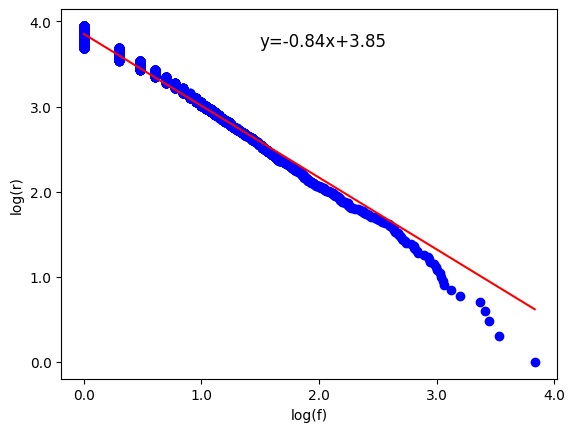

In [185]:
import matplotlib.pyplot as plt
import math
import numpy as np

def readfile(filename, fn):
    hist={}
    with open(filename, 'r') as f:
        lines=f.readlines()[fn:]
    for line in lines:
        processline(line,hist)     
    return hist

def processline(line,hist):
    line=line.replace('-',' ')
    words=list(line.split(" "))
    for w in words:
        w=w.strip().lower()
        w=w.translate(str.maketrans('','',string.punctuation))
        w=w.translate(str.maketrans('','','“”'))
        w=re.sub("’s",'', w)
        w=re.sub("n’t",'', w)
        if w !='':
            hist[w]=hist.get(w,0)+1


def histtozipf(h):
    wordlist=[]
    i=1
    sorted_h=dict(sorted(h.items(), key=lambda x: x[1], reverse=True))
    for key, value in sorted_h.items():
        wordlist.append((value, key, math.log10(value), math.log10(i)))
        i+=1
    
    dt= np.dtype([('freq', np.int32), ('word', 'U10'),('log(f)', np.float32),('log(r)', np.float32)])
    xarr=np.array(wordlist, dtype=dt)
    return xarr

def graphplot(xarr):
    x=xarr['log(f)']
    y=xarr['log(r)']

    plt.scatter(x, y, color='blue', label='Data points')
    plt.ylabel('log(r)')
    plt.xlabel('log(f)')
    
    coeff=np.polyfit(x,y,1)
    best_fit=np.polyval(coeff, x)
    plt.plot(x, best_fit, color='red', label='best fit line')

    #equation
    slope, intercept = coeff
    eqn= "y={0:.2f}x+{1:.2f}".format(slope,intercept)
    plt.text(0.4, 0.9, eqn, transform=plt.gca().transAxes, fontsize=12, color='black')
    
    plt.xticks(np.arange(min(x), max(x) + 1, 1), labels=[str(i) for i in np.arange(min(x), max(x) + 1, 1)])
    plt.yticks(np.arange(min(y),max(y)+1,1), labels=[str(i) for i in np.arange(min(y), max(y) + 1, 1)])
    plt.show()

def main():
    dd=readfile('pg74489.txt',144)
    plotdata=histtozipf(dd)
    graphplot(plotdata)


if __name__=='__main__':
    main()

In [146]:
if (34,'a')<(124,'b'):
    print('ey')

ey


In [159]:
print('we')

a={'as':124,'ag':525}
sum(a.values())


x={'an': 275, 'important': 7, 'letter': 13, 'news': 13}

for xx in x.items():
    print(xx[1])

print(x.items(), lambda x: x[1])

we
275
7
13
13
dict_items([('an', 275), ('important', 7), ('letter', 13), ('news', 13)]) <function <lambda> at 0x1194391c0>


In [186]:
import os

print(os.getcwd())

/Users/jaejinbang/Library/CloudStorage/OneDrive-Personal/Documents/CodingStudy/thinklikeCS/ThinkPython2
